In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Store Table.xlsx')
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID
0,1,Peoria,Arizona,Region 2,Old,2601.0,48610.0,1
1,2,Midland,Texas,Region 2,Old,2727.0,45689.0,2
2,3,Spokane,Washington,Region 2,Old,2768.0,49554.0,3
3,4,Denton,Texas,Region 2,Old,2759.0,38284.0,4
4,5,Overland Park,Kansas,Region 2,Old,2869.0,59887.0,5


In [3]:
df.tail()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID
2010,1295,Gainesville,Florida,Region 1,Old,2418.910277,33453.984223,1295
2011,1296,Dayton,Ohio,Region 1,Old,2418.521400,33449.189266,1296
2012,1297,Wichita Falls,Texas,Region 2,Old,2418.132522,33444.394310,1297
2013,1298,Naperville,Illinois,Region 1,Old,2417.743644,33439.599354,1298
2014,1299,Clovis,California,Region 2,Old,2417.354767,33434.804398,1299


In [4]:
df.shape   # 2015 raws & 8 coulmns

(2015, 8)

In [5]:
df.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue', 'Maket ID'],
      dtype='object')

In [6]:
df.isnull().sum() 

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
Maket ID           0
dtype: int64

In [7]:
df.isna().sum()   

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
Maket ID           0
dtype: int64

In [8]:
df.duplicated().sum()

15

In [9]:
# remove the duplicated values
df.drop_duplicates(inplace = True)

In [10]:
df[['Marketing Spend','Revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing Spend,2000.0,2533.434768,245.965787,1811.0,2335.982102,2525.268336,2711.054671,3984.0
Revenue,2000.0,34866.098830,5049.059427,15562.0,32225.276691,34611.966150,36989.065696,68828.0


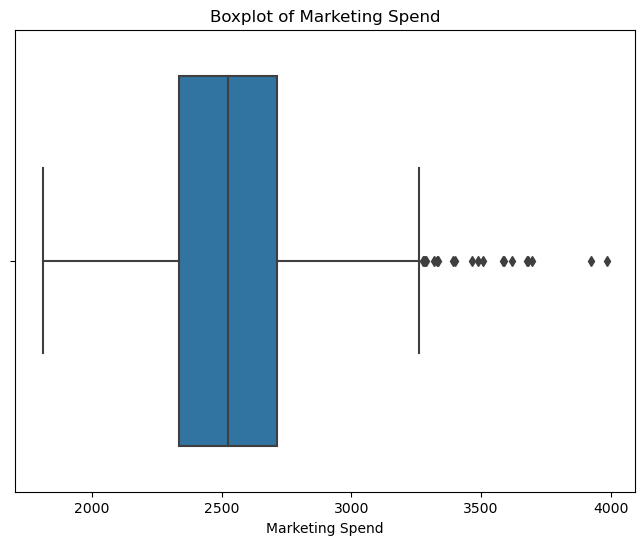

In [11]:
plt.figure(figsize =(8,6))
sns.boxplot(x ='Marketing Spend',data = df)
plt.xlabel('Marketing Spend')
plt.title('Boxplot of Marketing Spend')
plt.show()

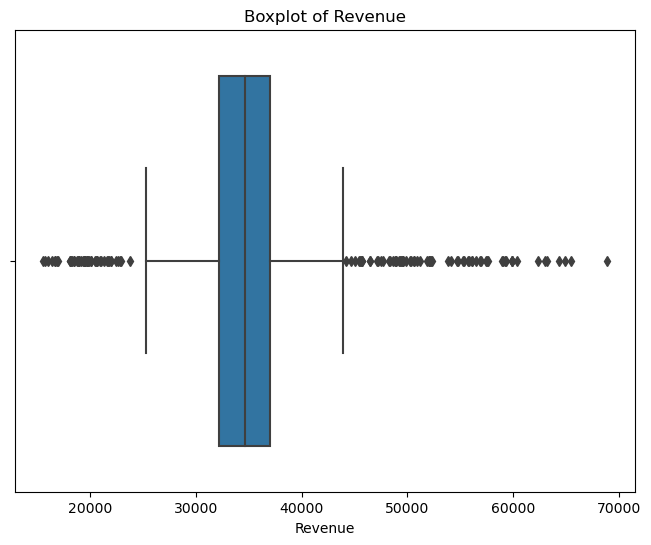

In [12]:
plt.figure(figsize =(8,6))
sns.boxplot(x ='Revenue',data = df)
plt.xlabel('Revenue')
plt.title('Boxplot of Revenue')
plt.show()

In [13]:
def detect_outliers_iqr(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

revenue_outliers = detect_outliers_iqr(df['Revenue'])

if revenue_outliers:
    print("Outliers detected in Revenue:")
    print(revenue_outliers)
else:
    print("No outliers detected in Revenue")
    
print("-----------------------------------------------------")
marketing_spend_outliers = detect_outliers_iqr(df['Marketing Spend']) 

if marketing_spend_outliers:
    print("Outliers detected in Marketing Spend:")
    print(marketing_spend_outliers)
else:
    print("No outliers detected in Marketing Spend")

Outliers detected in Revenue:
[48610.0, 45689.0, 49554.0, 59887.0, 53827.0, 60338.0, 19569.0, 59840.0, 64906.0, 16860.0, 21988.0, 19888.0, 54701.0, 18471.0, 16690.0, 47729.0, 63027.0, 19120.0, 56836.0, 52114.0, 20123.0, 49856.0, 55790.0, 45017.0, 56921.0, 22972.0, 22680.0, 65475.0, 21718.0, 59283.0, 20057.0, 20455.0, 64302.0, 49506.0, 52250.0, 57625.0, 16029.0, 49191.0, 59870.0, 48254.0, 16372.0, 50233.0, 50364.0, 44223.0, 17006.0, 15562.0, 21824.0, 46490.0, 19350.0, 16652.0, 23764.0, 19448.0, 68828.0, 19529.0, 55684.0, 45418.0, 18297.0, 18966.0, 18838.0, 52078.0, 58951.0, 49609.0, 45550.0, 19563.0, 57530.0, 54768.0, 18754.0, 21286.0, 48796.0, 19708.0, 56089.0, 19752.0, 20949.0, 45666.0, 47482.0, 18215.0, 50650.0, 48933.0, 15735.0, 20669.0, 20541.0, 45632.0, 22824.0, 21953.0, 51229.0, 50583.0, 50895.0, 46503.0, 18089.0, 56504.0, 44635.0, 19811.0, 56140.0, 54145.0, 51882.0, 49290.0, 47108.0, 20703.0, 18099.0, 18942.0, 52072.0, 55203.0, 59254.0, 21603.0, 21056.0, 57432.0, 18454.0, 59060.

In [14]:
# repalce the values of the new expansion columns
df['New Expansion'] = df['New Expansion'].replace('Old','old')
df['New Expansion'] = df['New Expansion'].replace('New','new')

In [15]:
# show correlation between the marketing spend and revenue
correlation = df['Marketing Spend'].corr(df['Revenue'])
print(f"Correlation between Marketing Spend and Revenue: {correlation}")

Correlation between Marketing Spend and Revenue: 0.5327252712732411


there is a postive corelation between the matket spend and revenue

C:\Users\pc-touch2023\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


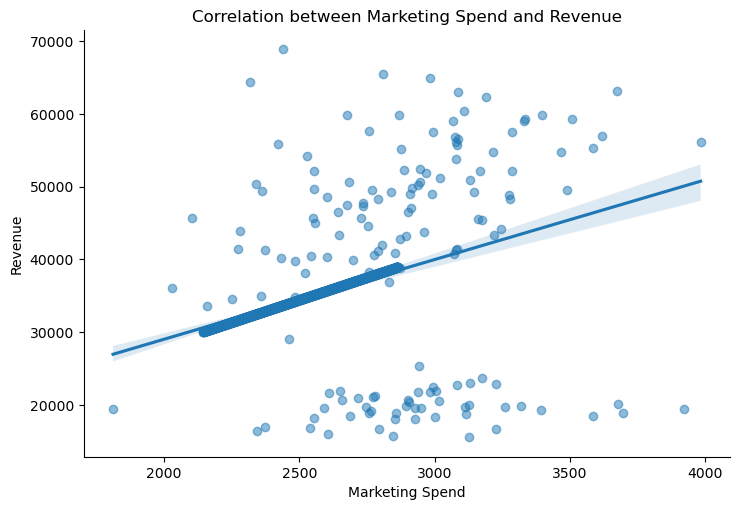

In [16]:
# lmplot: create a scatter plot with a linear regression line 
# aspect ratio (width-to-height ratio) of the plot. A value of 1.5 means the plot will be 1.5 times wider than it is tall.
# {'alpha':0.5} sets the transparency of the scatter points to 0.5 (50% opacity)
sns.lmplot(x='Marketing Spend', y='Revenue', data=df, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Correlation between Marketing Spend and Revenue')
plt.xlabel('Marketing Spend')
plt.ylabel('Revenue')
plt.show()

In [17]:
#calculate retern of invesment per market spend
df['ROI'] = (df['Revenue'] - df['Marketing Spend']) / df['Marketing Spend']

In [18]:
# Round the 'ROI' column to two decimal places
df['ROI'] = df['ROI'].round(2)
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Maket ID,ROI
0,1,Peoria,Arizona,Region 2,old,2601.0,48610.0,1,17.69
1,2,Midland,Texas,Region 2,old,2727.0,45689.0,2,15.75
2,3,Spokane,Washington,Region 2,old,2768.0,49554.0,3,16.90
3,4,Denton,Texas,Region 2,old,2759.0,38284.0,4,12.88
4,5,Overland Park,Kansas,Region 2,old,2869.0,59887.0,5,19.87


array([[<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'Revenue'}>],
       [<Axes: title={'center': 'ROI'}>, <Axes: >]], dtype=object)

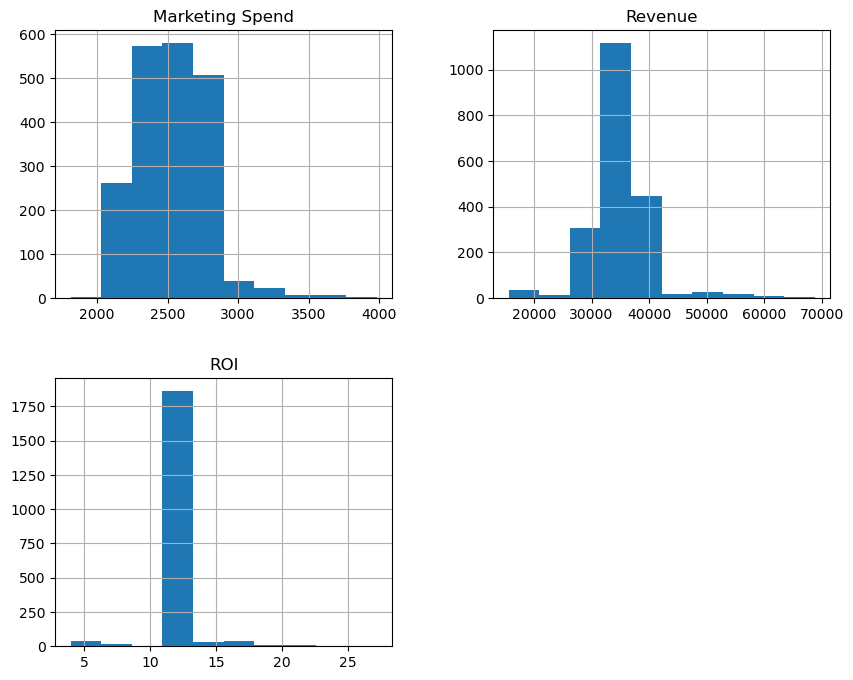

In [19]:
df[['Marketing Spend', 'Revenue','ROI']].hist(figsize=(10,8))

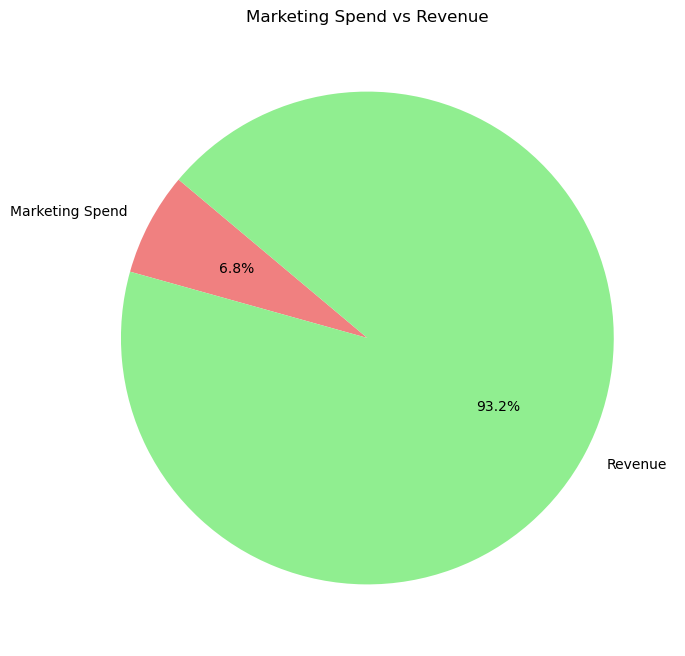

In [20]:
marketing_spend_total = df['Marketing Spend'].sum()
revenue_total = df['Revenue'].sum()
labels = ['Marketing Spend', 'Revenue']
sizes = [marketing_spend_total, revenue_total]
colors = sns.color_palette('pastel')  # Use a pastel color palette
plt.figure(figsize=(8, 8))
# autopct : Displays percentages on the slices & startangle=140 : Rotates the pie chart so that the first slice starts at 140 degrees.
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen'])
plt.title('Marketing Spend vs Revenue')
plt.show()

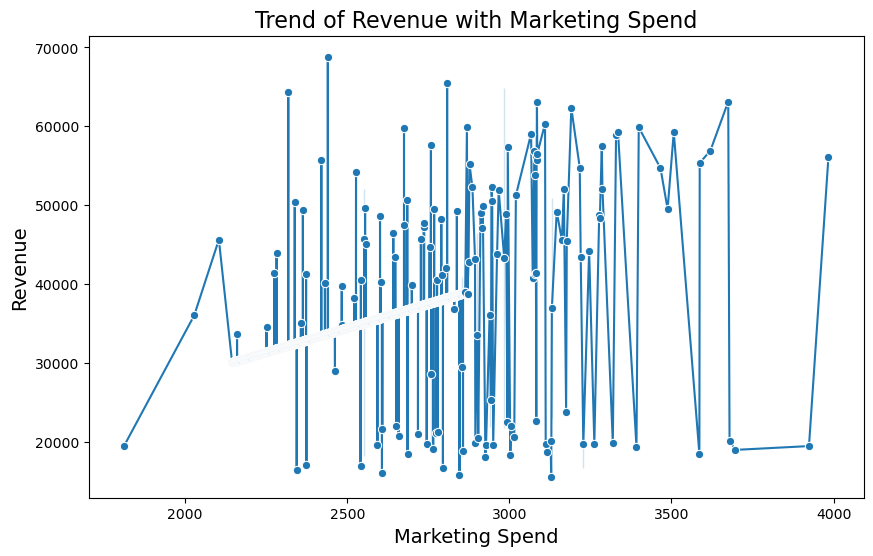

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Marketing Spend', y='Revenue', data=df, marker='o')
plt.title('Trend of Revenue with Marketing Spend', fontsize=16)
plt.xlabel('Marketing Spend', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.show()

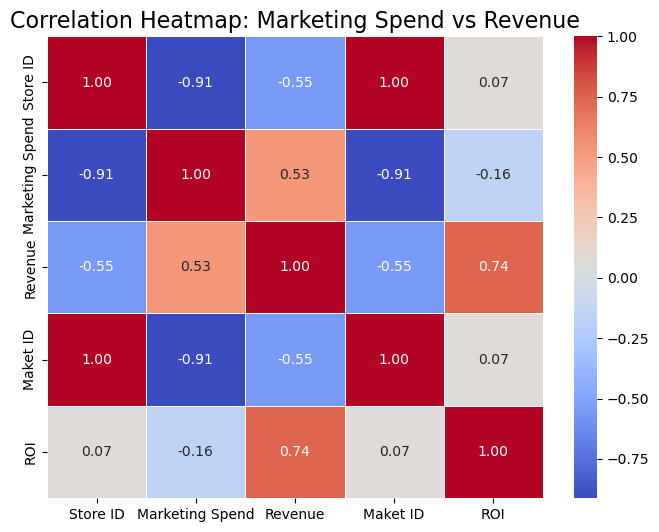

In [23]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Marketing Spend vs Revenue', fontsize=16)
plt.show()